# Risiko Kesehatan Ibu

## Data Understanding

### Sumber Dataset

https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Ahmed, M. (2020). Maternal Health Risk [Dataset]. UCI Machine Learning

https://doi.org/10.24432/C5DP5D.

### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk memprediksi tingkat risiko kesehatan ibu hamil berdasarkan beberapa fitur klinis.

| **Nama Fitur** | **Tipe Data**       | **Deskripsi**                                                                                                       |
| -------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `Age`          | Numerik (int/float) | Usia ibu hamil dalam tahun.                                                                                         |
| `SystolicBP`   | Numerik             | Tekanan darah sistolik (angka atas dalam pengukuran tekanan darah).                                                 |
| `DiastolicBP`  | Numerik             | Tekanan darah diastolik (angka bawah dalam pengukuran tekanan darah).                                               |
| `BS`           | Numerik             | Kadar gula darah (*blood sugar*) ibu. Bisa dalam satuan mmol/L.                                                     |
| `BodyTemp`     | Numerik             | Suhu tubuh ibu dalam derajat Celsius.                                                                               |
| `HeartRate`    | Numerik             | Detak jantung ibu per menit.                                                                                        |
| `RiskLevel`    | Kategorikal         | Label target (output): tingkat risiko kehamilan. Memiliki 3 kelas:<br>• `low risk`<br>• `mid risk`<br>• `high risk` |

### Eksplorasi data

Dataset ini tidak ada missing value

#### Visualisasi data

In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

# metadata
print(maternal_health_risk.metadata)

# variable information
print(maternal_health_risk.variables)

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'ID': 274, 'type': 'NATIVE', 'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors':

In [ ]:
import pandas as pd

# Gabungkan fitur dan target
df_Maternal = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_Maternal))
print("Visualisasi dataset Maternal")
print(df_Maternal.to_string(index=False))

Total baris dataset ini adalah = 1014
Visualisasi dataset Maternal
 Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
  25         130           80 15.00      98.0         86 high risk
  35         140           90 13.00      98.0         70 high risk
  29          90           70  8.00     100.0         80 high risk
  30         140           85  7.00      98.0         70 high risk
  35         120           60  6.10      98.0         76  low risk
  23         140           80  7.01      98.0         70 high risk
  23         130           70  7.01      98.0         78  mid risk
  35          85           60 11.00     102.0         86 high risk
  32         120           90  6.90      98.0         70  mid risk
  42         130           80 18.00      98.0         70 high risk
  23          90           60  7.01      98.0         76  low risk
  19         120           80  7.00      98.0         70  mid risk
  25         110           89  7.01      98.0         77  low 

In [ ]:
# Simpan ke file CSV
df_Maternal.to_csv('Maternal Health Risk Data Set.csv', index=False)

## Preprocessing Data

### Transformasi data

Target yang sebelumnya berisi numerik diubah ke kategorikal, antara lain RiskLevel menjadi High Risk, Mid Risk, Low Risk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df_Maternal = pd.read_csv('Maternal Health Risk Data Set.csv')  # Ganti path jika perlu

# 2. Transformasi nilai pada kolom RiskLevel menjadi huruf kapital konsisten (opsional)
df_Maternal['RiskLevel'] = df_Maternal['RiskLevel'].str.lower()

# Jika ingin terjemahan ke Bahasa Indonesia:
df_Maternal['RiskLevel'] = df_Maternal['RiskLevel'].map({
    'high risk': 'Tinggi',
    'mid risk': 'Sedang',
    'low risk': 'Rendah'
})

# Menampilkan semua baris dengan index disembunyikan
print(df_Maternal.to_string(index=False))

 Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
  25         130           80 15.00      98.0         86    Tinggi
  35         140           90 13.00      98.0         70    Tinggi
  29          90           70  8.00     100.0         80    Tinggi
  30         140           85  7.00      98.0         70    Tinggi
  35         120           60  6.10      98.0         76    Rendah
  23         140           80  7.01      98.0         70    Tinggi
  23         130           70  7.01      98.0         78    Sedang
  35          85           60 11.00     102.0         86    Tinggi
  32         120           90  6.90      98.0         70    Sedang
  42         130           80 18.00      98.0         70    Tinggi
  23          90           60  7.01      98.0         76    Rendah
  19         120           80  7.00      98.0         70    Sedang
  25         110           89  7.01      98.0         77    Rendah
  20         120           75  7.01     100.0         70    Se

### Penanganan Missing Value

Pada Tahap ini, saya melakukan pengecekan missing value dari setiap kolom

In [ ]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# 2. Cek jumlah missing value di setiap kolom
missing_per_column = df.isnull().sum()

# 3. Tampilkan hanya kolom yang memiliki missing value
missing_filtered = missing_per_column[missing_per_column > 0]

# 4. Tampilkan hasil
print("Missing Value per Kolom:")
print(missing_filtered)

Missing Value per Kolom:
Series([], dtype: int64)


### Pencarian Outlier

Pada tahap ini, saya melakukan pencarian outlier dari setiap kolom

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# 2. Pilih kolom numerik (kecuali 'RiskLevel')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 3. Tidak perlu imputasi karena tidak ada missing value

# 4. Terapkan LOF
X = df[numeric_cols]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # n_neighbors disesuaikan dengan jumlah data
y_pred = lof.fit_predict(X)
df['LOF_Outlier'] = y_pred

# 5. Filter baris outlier
outlier_rows = df[df['LOF_Outlier'] == -1]

# 6. Identifikasi kolom mana saja yang nilai outlier-nya ekstrem (berdasarkan IQR)
outlier_info = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count_outliers = ((outlier_rows[col] < lower) | (outlier_rows[col] > upper)).sum()
    if count_outliers > 0:
        outlier_info[col] = count_outliers

# 7. Tampilkan hasil terurut
outlier_info_sorted = dict(sorted(outlier_info.items(), key=lambda x: x[1], reverse=True))
print("Kolom dengan outlier terbanyak berdasarkan LOF + IQR:")
for col, count in outlier_info_sorted.items():
    print(f"{col}: {count} outlier")

Kolom dengan outlier terbanyak berdasarkan LOF + IQR:
BodyTemp: 14 outlier
BS: 6 outlier
HeartRate: 2 outlier


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


### Normalisasi data

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Kolom yang akan distandarkan
cols_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Inisialisasi scaler
scaler = StandardScaler()

# Salin dataframe
df_scaled = df.copy()

# Terapkan standarisasi
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Cek hasil
print(df_scaled.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956  high risk
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088  high risk
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815  high risk
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088  high risk
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054   low risk


### Split data

Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Standarisasi fitur
cols_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Pisahkan fitur dan target
X = df_scaled[cols_to_scale]  # Fitur hanya kolom numerik
y = df_scaled['RiskLevel']    # Target

# Split 80:20 dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Cek jumlah data
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 811
Jumlah data uji: 203


#### Visualisasi data setelah preprocessing

Berikut adalah visualisasi data setelah tahap preprocessing

In [ ]:
import pandas as pd

# Gabungkan fitur dan target kembali setelah preprocessing
df_scaled = pd.concat([X, y], axis=1)

# Tampilkan jumlah baris dataset
print("Total baris dataset ini adalah =", len(df_scaled))

# Tampilkan deskripsi sesuai dataset Anda
print("Visualisasi dataset Maternal Health Risk setelah tahap preprocessing dan target dikategorikan:")

# Tampilkan dataset
print(df_scaled)

Total baris dataset ini adalah = 1014
Visualisasi dataset Maternal Health Risk setelah tahap preprocessing dan target dikategorikan:
           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0    -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956   
1     0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088   
2    -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815   
3     0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088   
4     0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054   
...        ...         ...          ...       ...       ...        ...   
1009 -0.584493    0.369765    -1.186009  1.905890 -0.485215   0.704815   
1010  1.865807    0.369765     0.975539  2.817216 -0.485215  -1.768990   
1011  0.380777   -1.532942    -1.186009  3.120991 -0.485215   1.446956   
1012  0.974789    0.369765     0.975539  2.817216 -0.485215  -0.532088   
1013  0.158022    0.369765    -0.825751 -0.828087  1.

In [ ]:
# Simpan ke file CSV
df_Maternal.to_csv('Maternal Health Risk Data Set.csv', index=False)

## Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### Modelling Klasifikasi Risiko Kesehatan Ibu menggunakan Decision Tree

Pemodelan ini bertujuan untuk **memprediksi tingkat risiko kesehatan ibu (low risk, mid risk, high risk)** berdasarkan sejumlah fitur klinis hasil pemeriksaan seperti usia ibu, tekanan darah sistolik, tekanan darah diastolik, kadar gula darah, suhu tubuh, dan detak jantung.

### **Kelas Target**

Kelas target dalam model ini terdiri dari tiga kategori:

* **Low risk** (Risiko Rendah)
* **Mid risk** (Risiko Sedang)
* **High risk** (Risiko Tinggi)

### **Model yang Digunakan**

Model klasifikasi yang digunakan adalah **Decision Tree Classifier**, salah satu metode *supervised learning* berbasis struktur pohon bercabang. Setiap cabang merepresentasikan keputusan berdasarkan nilai fitur, dan setiap daun pada pohon menunjukkan hasil klasifikasi akhir.

### **1. Pembagian Dataset: Data Latih dan Data Uji**

Langkah pertama dalam pemodelan adalah membagi dataset menjadi:

* **Data Latih (Training Set):** digunakan untuk melatih model.
* **Data Uji (Testing Set):** digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat.

Dalam eksperimen ini digunakan rasio **80% data latih dan 20% data uji**, yang merupakan praktik umum dalam pembelajaran mesin.

### **2. Pra-Pemrosesan Data**

Sebelum data digunakan dalam pelatihan model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan sebagai berikut:

* **Transformasi Label:** kolom target `RiskLevel` yang berisi kategori `low risk`, `mid risk`, dan `high risk` diubah menjadi label numerik menggunakan LabelEncoder agar dapat dibaca oleh model.
* **Standarisasi Data:** fitur numerik (`Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, `HeartRate`) dinormalisasi menggunakan `StandardScaler` untuk menjaga konsistensi skala antar fitur saat diperlukan, meskipun Decision Tree tidak sensitif terhadap skala.

### **3. Pelatihan Model Decision Tree**

Model dilatih menggunakan algoritma Decision Tree dengan konfigurasi:

* **Kriteria Pemisahan:** `gini` (untuk mengukur impurity pada setiap split).
* **Kedalaman Maksimal Pohon:** `5` untuk mencegah overfitting pada data pelatihan.

Selama pelatihan, model akan secara otomatis memilih fitur-fitur yang paling berpengaruh dalam pembagian data pada setiap node, membentuk struktur pohon keputusan secara hierarkis.

### **4. Evaluasi Model**

Model dievaluasi menggunakan:

* **Akurasi:** persentase prediksi yang benar dari total data uji.
* **Classification Report:** menampilkan nilai precision, recall, dan F1-score untuk masing-masing kelas (`low risk`, `mid risk`, `high risk`).
* **Confusion Matrix:** memberikan gambaran distribusi prediksi model terhadap nilai sebenarnya untuk mengevaluasi kesalahan klasifikasi.

Selain itu, **struktur pohon keputusan divisualisasikan** untuk memperlihatkan urutan pengambilan keputusan serta fitur-fitur yang paling berkontribusi dalam klasifikasi.

### **5. Prediksi dan Interpretasi**

Model yang telah dilatih dapat digunakan untuk:

* **Memprediksi tingkat risiko kesehatan ibu** berdasarkan input fitur pasien.
* **Mengidentifikasi fitur klinis yang paling menentukan dalam prediksi risiko**, seperti:

  * Tekanan darah sistolik (`SystolicBP`)
  * Usia (`Age`)
  * Kadar gula darah (`BS`)
  * Detak jantung (`HeartRate`)

Sehingga, **model ini membantu dalam pengambilan keputusan dini dalam pemantauan risiko kesehatan ibu selama kehamilan**, mendukung efisiensi layanan kesehatan preventif berbasis data.

Akurasi: 0.6699507389162561

=== Classification Report ===
              precision    recall  f1-score   support

   high risk       0.98      0.76      0.86        55
    low risk       0.59      0.91      0.72        81
    mid risk       0.57      0.30      0.39        67

    accuracy                           0.67       203
   macro avg       0.71      0.66      0.66       203
weighted avg       0.69      0.67      0.65       203



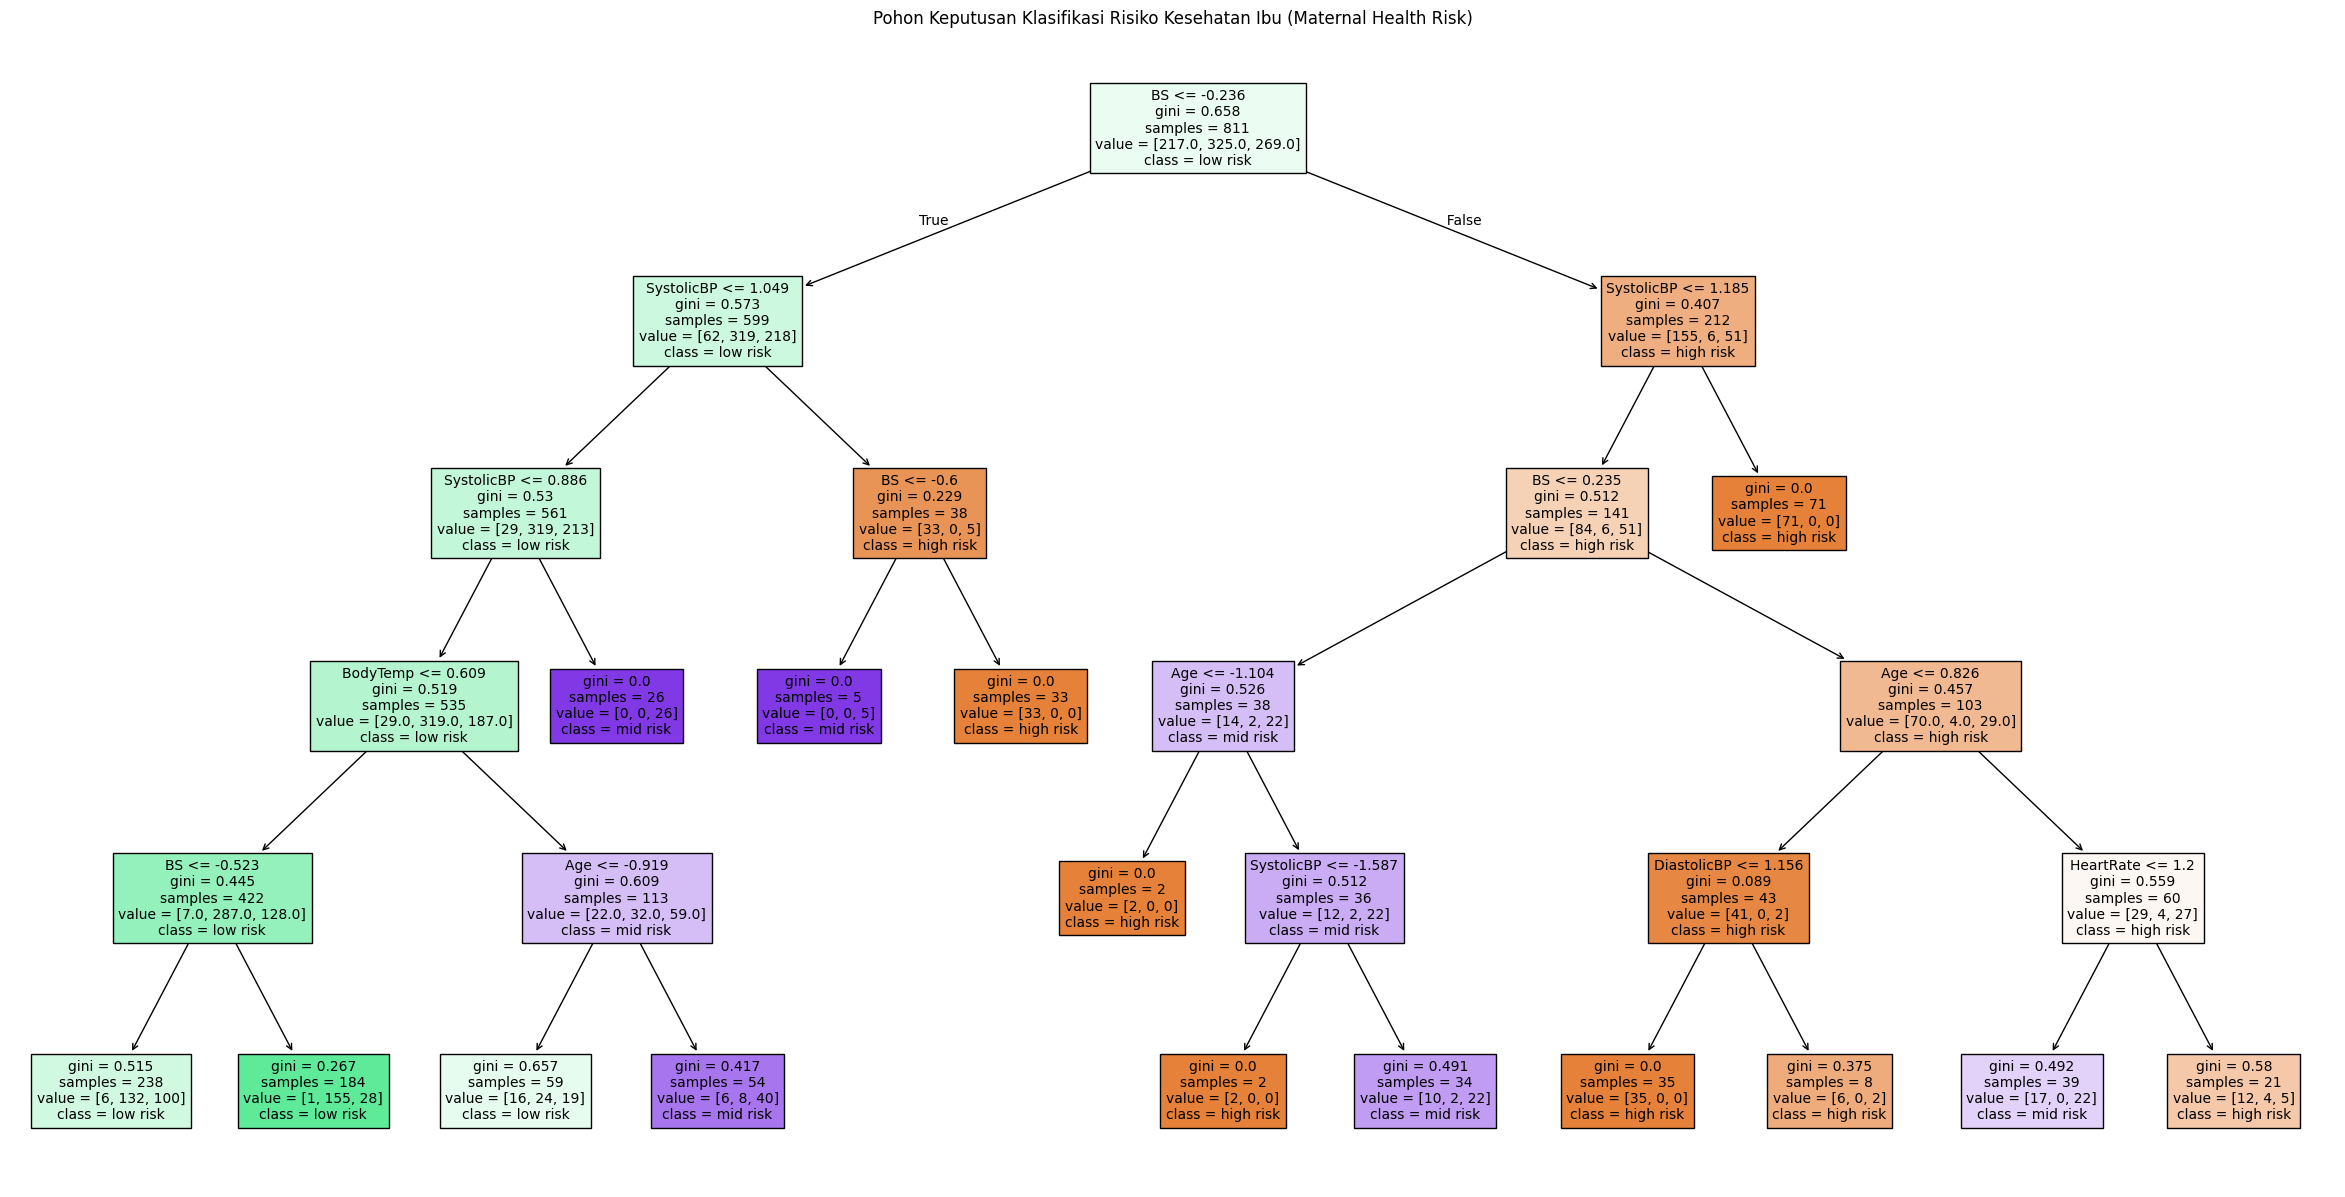

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(30, 15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Klasifikasi Risiko Kesehatan Ibu (Maternal Health Risk)")
plt.show()

### Modelling Klasifikasi Risiko Kesehatan Ibu menggunakan Gaussian Naive Bayes

Pemodelan ini bertujuan untuk **memprediksi tingkat risiko kesehatan ibu (low risk, mid risk, high risk)** berdasarkan sejumlah fitur klinis dari hasil pemeriksaan pasien, seperti usia ibu, tekanan darah sistolik dan diastolik, kadar gula darah, suhu tubuh, serta detak jantung.

### **Kategori Target**

Klasifikasi ini memiliki tiga kategori target, yaitu:

* **Low risk** (Risiko Rendah)
* **Mid risk** (Risiko Sedang)
* **High risk** (Risiko Tinggi)

## **1. Pembagian Dataset: Data Latih dan Data Uji**

Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua bagian:

* **Data Latih (Training Set):** digunakan untuk melatih model.
* **Data Uji (Testing Set):** digunakan untuk menguji kemampuan model pada data yang belum pernah dilihat.

Untuk eksperimen ini digunakan **rasio 80% data latih dan 20% data uji**, yang merupakan praktik umum dalam pembelajaran mesin, dengan mempertimbangkan distribusi kelas agar tetap seimbang menggunakan **stratifikasi**.

## **2. Pra-Pemrosesan Data**

Sebelum data digunakan untuk pelatihan model Gaussian Naive Bayes, dilakukan tahapan pra-pemrosesan berikut:

* **Transformasi Label Target:** kolom `RiskLevel` yang berisi `low risk`, `mid risk`, dan `high risk` diubah menjadi label numerik menggunakan LabelEncoder agar dapat dibaca oleh algoritma.

* **Standarisasi Data:** fitur numerik seperti `Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, dan `HeartRate` dinormalisasi menggunakan **StandardScaler** untuk menjaga stabilitas perhitungan probabilitas Gaussian dan membantu proses pelatihan model, meskipun Gaussian Naive Bayes relatif tahan terhadap skala data.

## **3. Pelatihan Model Gaussian Naive Bayes**

Model dilatih menggunakan algoritma **Gaussian Naive Bayes (GaussianNB)**, yang mengasumsikan bahwa data numerik mengikuti distribusi normal (Gaussian).

Setiap fitur pada dataset akan dihitung nilai rata-rata dan variansi untuk masing-masing kelas, kemudian digunakan dalam perhitungan probabilitas posterior selama prediksi.

## **4. Evaluasi Model**

Setelah pelatihan, performa model dievaluasi menggunakan:

* **Akurasi:** menunjukkan persentase prediksi model yang sesuai dengan nilai aktual pada data uji.
* **Classification Report:** menampilkan nilai precision, recall, dan F1-score untuk setiap kelas (`low risk`, `mid risk`, `high risk`).
* **Confusion Matrix:** menggambarkan distribusi prediksi model terhadap data aktual, membantu dalam analisis kesalahan prediksi dan mengecek apakah model bias ke salah satu kelas.

Evaluasi ini penting dalam konteks medis untuk memastikan bahwa model tidak hanya memprediksi satu kelas dominan secara terus-menerus, sehingga dapat membantu proses **deteksi risiko kesehatan ibu secara seimbang**.

## **5. Prediksi dan Interpretasi**

Model Gaussian Naive Bayes yang telah dilatih dapat digunakan untuk:

* **Memprediksi tingkat risiko kesehatan ibu** pada data pasien baru berdasarkan input fitur klinis yang tersedia.
* **Mengestimasi probabilitas** bahwa data termasuk dalam kategori `low risk`, `mid risk`, atau `high risk`.
* Memberikan **insight awal yang cepat dan ringan untuk mendukung pengambilan keputusan preventif dan diagnosis risiko kesehatan ibu** tanpa memerlukan perhitungan kompleks.

Akurasi: 0.6009852216748769

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       0.58      0.91      0.71        81
      Sedang       0.31      0.12      0.17        67
      Tinggi       0.82      0.73      0.77        55

    accuracy                           0.60       203
   macro avg       0.57      0.59      0.55       203
weighted avg       0.55      0.60      0.55       203



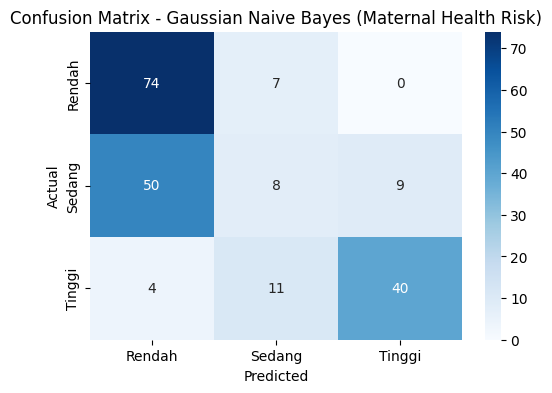

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# === 2. Label Encoding pada kolom RiskLevel ===
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])
# Cek mapping label:
# print(dict(zip(le.classes_, le.transform(le.classes_))))

# === 3. Standarisasi fitur numerik ===
cols_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# === 4. Pisahkan fitur (X) dan target (y) ===
X = df_scaled[cols_to_scale]
y = df_scaled['RiskLevel']

# === 5. Split data train dan test (80:20) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# === 6. Latih model Gaussian Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 7. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # label sesuai hasil LabelEncoder
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes (Maternal Health Risk)")
plt.show()

### Modelling Klasifikasi Risiko Kesehatan Ibu menggunakan K-Nearest Neighbor (K-NN)

Pemodelan ini bertujuan untuk **memprediksi tingkat risiko kesehatan ibu (low risk, mid risk, high risk)** berdasarkan sejumlah fitur klinis yang diperoleh dari hasil pemeriksaan pasien, seperti usia, tekanan darah sistolik dan diastolik, kadar gula darah, suhu tubuh, dan detak jantung.

### **Kategori Target**

Klasifikasi ini memiliki tiga kategori utama:

* **Low risk** (Risiko Rendah)
* **Mid risk** (Risiko Sedang)
* **High risk** (Risiko Tinggi)

### **Metode yang Digunakan**

Metode yang digunakan adalah **K-Nearest Neighbors (KNN)**, yaitu algoritma *instance-based learning* yang mengklasifikasikan data baru berdasarkan mayoritas kelas dari **K tetangga terdekat dalam ruang fitur**.
Algoritma ini **tidak memerlukan pelatihan model secara eksplisit**, melainkan menyimpan seluruh data latih dan menghitung jarak antar titik saat prediksi.

### **1. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi dua bagian utama:

* **Data Latih (Training Set):** digunakan sebagai referensi untuk menentukan tetangga terdekat.
* **Data Uji (Testing Set):** digunakan untuk mengukur akurasi prediksi model pada data baru.

Pada eksperimen ini digunakan **rasio 80% data latih dan 20% data uji**, sesuai praktik umum untuk menjaga keseimbangan antara pelatihan dan evaluasi, dengan stratifikasi agar distribusi kelas tetap seimbang.

### **2. Pra-Pemrosesan Data**

Sebelum digunakan dalam model KNN, dataset melalui beberapa tahapan pra-pemrosesan penting:

* **Transformasi Label Target:** kolom `RiskLevel` yang berisi `low risk`, `mid risk`, dan `high risk` diubah menjadi label numerik menggunakan LabelEncoder agar dapat dibaca oleh algoritma KNN.

* **Standarisasi Data:** karena KNN sangat sensitif terhadap skala data (karena menggunakan perhitungan jarak Euclidean), fitur numerik seperti:

  * `Age`
  * `SystolicBP`
  * `DiastolicBP`
  * `BS`
  * `BodyTemp`
  * `HeartRate`

  distandarisasi menggunakan `StandardScaler` agar memiliki rata-rata 0 dan deviasi standar 1, sehingga mencegah fitur dengan skala besar mendominasi perhitungan jarak.

### **3. Pelatihan Model KNN**

Model KNN tidak memiliki proses pelatihan konvensional. Pada saat prediksi:

* Model akan menghitung jarak (Euclidean) antara data baru dengan seluruh data latih.
* Menentukan **K tetangga terdekat** (misalnya `K=5`).
* Mengklasifikasikan data baru berdasarkan mayoritas kelas dari tetangga-tetangga tersebut.

**Pemilihan nilai K sangat penting:**

* Nilai K terlalu kecil → sensitif terhadap noise (**overfitting**).
* Nilai K terlalu besar → terlalu umum dan kurang peka (**underfitting**).

### **4. Evaluasi Model**

Model KNN dievaluasi menggunakan:

* **Akurasi:** persentase prediksi yang benar pada data uji.
* **Classification Report:** menampilkan precision, recall, dan F1-score untuk masing-masing kelas (`low risk`, `mid risk`, `high risk`).
* **Confusion Matrix:** menunjukkan distribusi prediksi model terhadap nilai aktual untuk masing-masing kelas.

Confusion matrix divisualisasikan menggunakan **heatmap** agar memudahkan analisis kesalahan prediksi.

### **5. Prediksi dan Implementasi**

Setelah model disiapkan dan dievaluasi, model KNN dapat digunakan untuk:

* **Memprediksi tingkat risiko kesehatan ibu pada pasien baru** berdasarkan fitur klinis yang tersedia.
* Memberikan klasifikasi berbasis kesamaan dengan data yang pernah dikumpulkan sebelumnya.
* Menjadi **sistem pendukung keputusan yang sederhana namun akurat** untuk deteksi risiko kesehatan ibu jika data sudah terstandarisasi dengan baik.

Akurasi: 0.6798029556650246

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       0.65      0.73      0.69        81
      Sedang       0.61      0.51      0.55        67
      Tinggi       0.80      0.82      0.81        55

    accuracy                           0.68       203
   macro avg       0.69      0.68      0.68       203
weighted avg       0.68      0.68      0.68       203



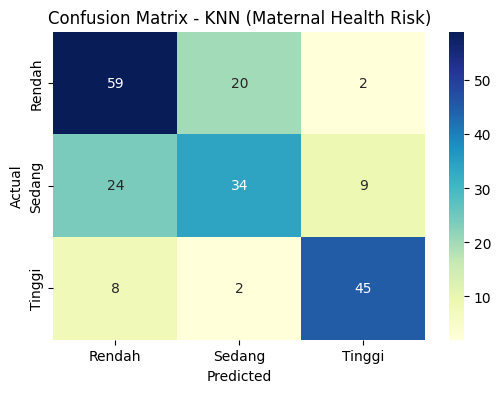

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# === 2. Label Encoding pada kolom RiskLevel ===
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

# === 3. Standarisasi fitur numerik ===
cols_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# === 4. Pisahkan fitur (X) dan target (y) ===
X = df_scaled[cols_to_scale]
y = df_scaled['RiskLevel']

# === 5. Split data train dan test (80:20) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# === 6. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # Anda dapat mengubah nilai k sesuai kebutuhan
knn.fit(X_train, y_train)

# === 7. Evaluasi ===
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # label sesuai hasil LabelEncoder
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap='YlGnBu'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Maternal Health Risk)")
plt.show()

## Evaluasi Data

Dari dataset kanker payudara diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 66,99%
* Gaussian Naive Bayes = 60,09%
* K-Nearest Neighbor = 67,98%

Dari ketiga model diatas dapat disimpulkan bahwa KNN memiliki akurasi tertinggi yaitu 67,98%.

## Deployment

Dari ketiga model, saya memilih model terbaik adalah KNN, yang memiliki akurasi tertinggi yaitu 67,98%

### Menyimpan model

In [ ]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(knn, 'model_knn.pkl')

print("Model KNN berhasil disimpan ke 'model_knn.pkl'")

Model KNN berhasil disimpan ke 'model_knn.pkl'


### Integrasi Model Dengan Web

* Install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.
* membuat file berekstensi .py, misal MaternalHealthRiskApp.py.
* didalam MaternalHealthRiskApp.py saya panggil model yang telah disimpan.
* setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

* Source code yang telah saya buat dapat diakses melalui link berikut :
https://github.com/cahyantii/UAS

### Hasil Web

Link web: https://maternalhealthriskdataset.streamlit.app/

Berikut adalah hasil dari webnya. Terdapat form untuk memasukkan fitur-fitur yang nantinya akan diprediksi.

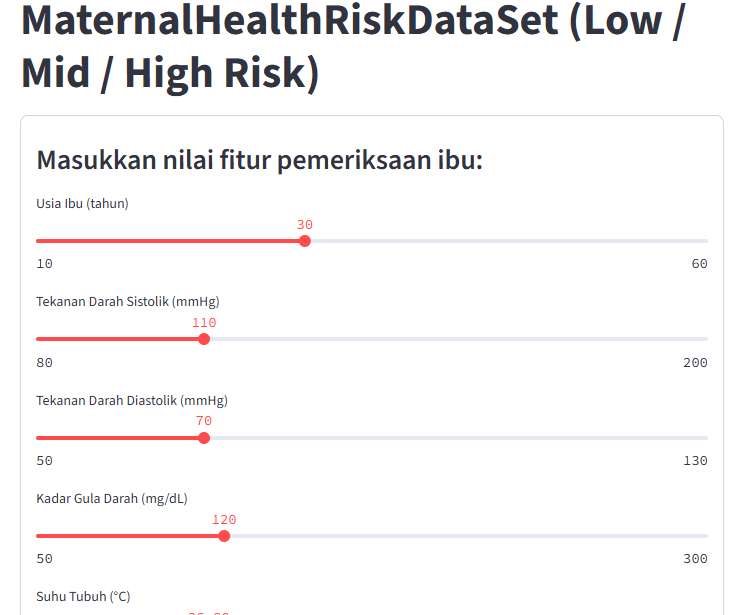

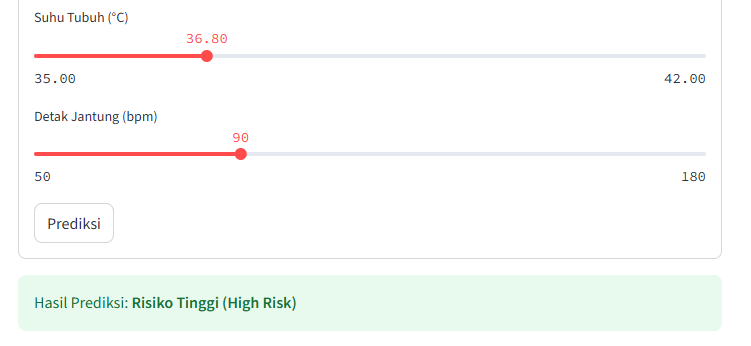